# Analisys

- According to the calculations of the average tumor sizes, the best performance was demonstrated by the following drug regimens: Capomulin, Ramicane, Ceftamin, and Infubonol.

- 51% of the mice tested were male and 49% were female, therefore the sex representation was balanced. 

- According to the bar plots, the largest number of mice were tested with Capomulin and Ramicane. These two drugs have also proved to be most effective according to the box plots with no potential outliers.

- The line chart representing the treatment with Capomulin of mouse i509, has shown a stable decrease of the tumor volume over the duration of the study. This is showing a positive effect of Capomulin treatment.

- The scatter plot and the linear regression statistics show a strong correlation between the increase of the mouse weight and the increase in tumor volume, therefore the more the weight of the mouse, the less effective then treatment proved to be. More in depth analysis in this particular correlation could be beneficial for the study.

- Overall, Capomulin has been proved to perform effectively.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

complete_data=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.

mice_count=len(complete_data["Mouse ID"].unique())

mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice=complete_data.loc[complete_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_alldata = complete_data[complete_data.duplicated(["Mouse ID", "Timepoint",])]
duplicate_alldata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

final_data=complete_data.loc[(complete_data['Mouse ID'] != 'g989')] 
final_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.

mice_num=len(final_data["Mouse ID"].unique())

mice_num

248

# Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean_summary=final_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_summary

median_summary=final_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_summary

variance_summary=final_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance_summary

standev_summary=final_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standev_summary

sem_summary=final_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
sem_summary

# Assemble the resulting series into a single summary DataFrame.

statistics_summary=pd.DataFrame({
    "Mean": mean_summary,
    "Median": median_summary,
    "Variance": variance_summary,
    "Standard Deviation": standev_summary,
    "SEM": sem_summary
})

statistics_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
final_data[["Drug Regimen", "Tumor Volume (mm3)"]]
final_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

statistics_summary2=final_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg({"mean", "median", "var", "std", "sem"})

statistics_summary2=statistics_summary.rename(columns={"mean":"Mean", "median": "Median", "var": "Variance", 
                                                "std": "Standard Deviation", "sem": "SEM"})

# Using the aggregation method, produce the same summary statistics in a single line.

statistics_summary2


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

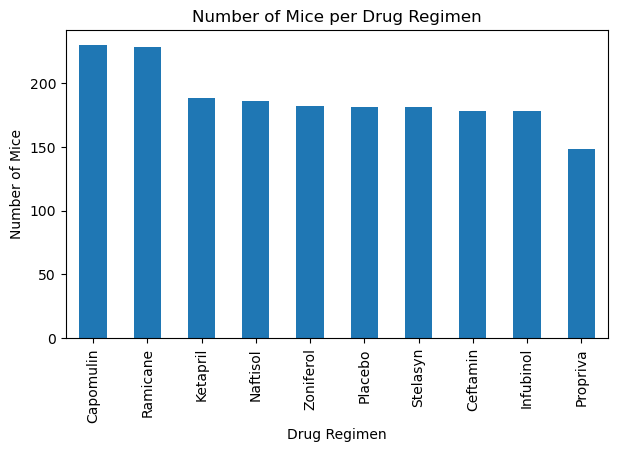

<Figure size 640x480 with 0 Axes>

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_drug_reg = final_data.groupby(["Drug Regimen"]).count()["Timepoint"]

barplot_mice_pandas= mice_drug_reg.sort_values(ascending=False).plot(kind="bar", figsize=(7,4))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")


plt.show()
plt.tight_layout()

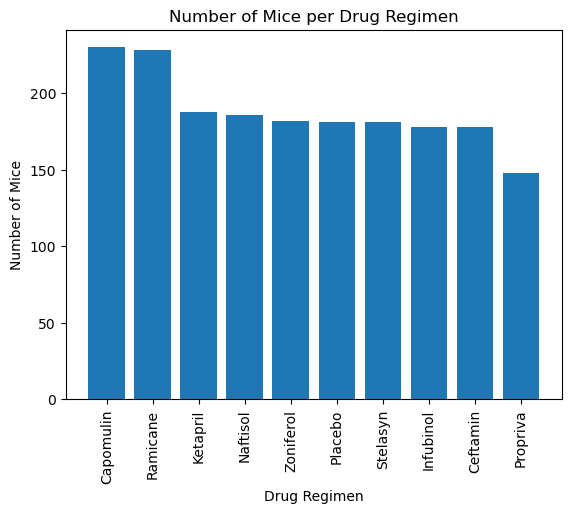

<Figure size 640x480 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Calculate the number of bars (Drug Regimen)

drug_counts = final_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_counts))

plt.bar(x_axis, drug_counts)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_counts.index.values, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")

plt.show()
plt.tight_layout()

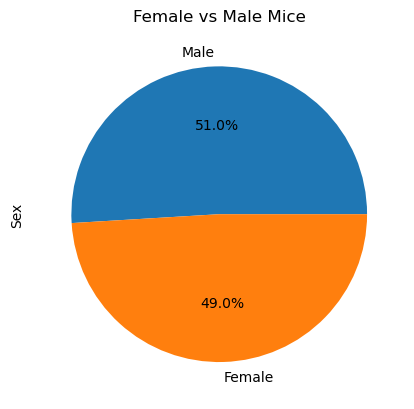

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_stats = final_data["Sex"].value_counts()
sex_stats.plot(kind="pie", y="Sex", autopct="%1.1f%%", title="Female vs Male Mice")
plt.show()


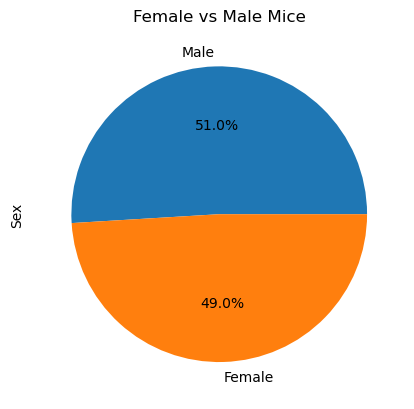

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_stats = final_data["Sex"].value_counts()
labels = ["Male", "Female"]

plt.pie(sex_stats, labels=labels, autopct="%1.1f%%")
plt.title("Female vs Male Mice")
plt.ylabel("Sex")

plt.show()

# Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse

final_tumor_volume = final_data.groupby(["Mouse ID"]) ["Timepoint"].max()
final_tumor_volume = final_tumor_volume.reset_index()
final_tumor_volume

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merge_group = pd.merge(final_data, final_tumor_volume, on=["Mouse ID", "Timepoint"])
merge_group

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [63]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_volume = merge_group.loc[merge_group["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    
    tumor_vol_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_volume.quantile([.25, .5, .75])
    q1 = quartiles[.25]
    q3 = quartiles[.75]
    iqr = q3 - q1 
    
    
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outliers = tumor_volume.loc[(tumor_volume <= lower_bound) | (tumor_volume >= upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


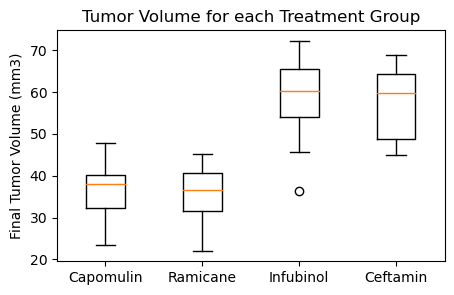

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, axs = plt.subplots(figsize=(5,3))
axs.set_title("Tumor Volume for each Treatment Group")
axs.set_ylabel("Final Tumor Volume (mm3)")
axs.boxplot(tumor_vol_data, labels=treatments, widths = 0.4, vert=True)


plt.show()

# Line and Scatter Plots

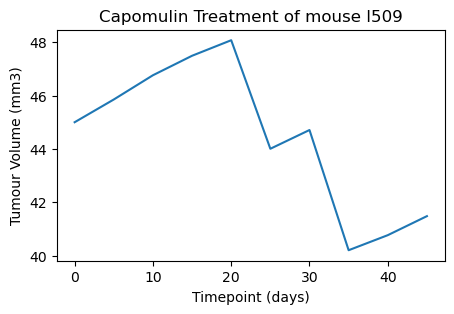

In [77]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#grab a specific mouse (l509), x axis is timepoiunt, y axis is tumor volume

capomulin_mouse = final_data.loc[final_data["Mouse ID"] == "l509"]

fig, axs = plt.subplots(figsize=(5, 3))

plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumour Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")

plt.show()

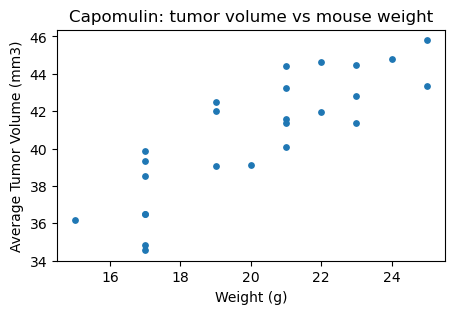

In [96]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#get only capomulin rows. then calculate average tumor volumes

capomulin_data = final_data.loc[final_data["Drug Regimen"] == "Capomulin",:]

av_tumor_vol = capomulin_data.groupby("Mouse ID").mean()

fig, axs = plt.subplots(figsize=(5, 3))
plt.scatter(av_tumor_vol["Weight (g)"], av_tumor_vol["Tumor Volume (mm3)"], s=15)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: tumor volume vs mouse weight")

plt.show()

# Correlation and Regression

In [97]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(av_tumor_vol['Weight (g)'],av_tumor_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")

The correlation between mouse weight and average tumor volume is: 0.84


y = 0.95x + 21.55


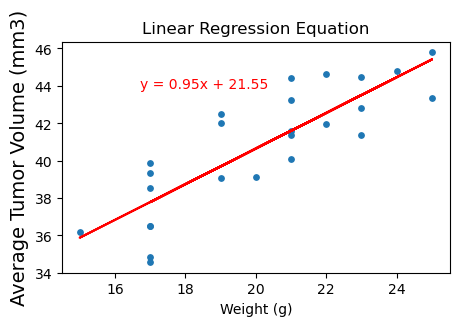

In [103]:
#fig, axs = plt.subplots(figsize=(5, 3))
#plt.scatter(av_tumor_vol["Weight (g)"], av_tumor_vol["Tumor Volume (mm3)"], s=15)
#plt.xlabel("Weight (g)")
#plt.ylabel("Average Tumor Volume (mm3)")
#plt.title("Capomulin: tumor volume vs mouse weight")

# Add the linear regression equation and line to the scatter plot
x = av_tumor_vol['Weight (g)']
y = av_tumor_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

fig1, ax1 = plt.subplots(figsize=(5, 3))
plt.scatter(x, y, s=15)
plt.plot(x, regress_values,"r-")
plt.title("Linear Regression Equation")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction",color="red")

plt.show()